In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

In [12]:
%matplotlib inline

In [13]:
def alpha(sratio,m):
    ss = 1.0
    a = ss*(sratio)**m*np.tanh( (1.0/sratio)**m)
    return a

In [14]:
sratio = np.arange(0,100)*2.0/100.0+0.01

In [15]:
am1 = alpha(sratio,1.0)
am3 = alpha(sratio,3.0)
am15 = alpha(sratio,15.0)

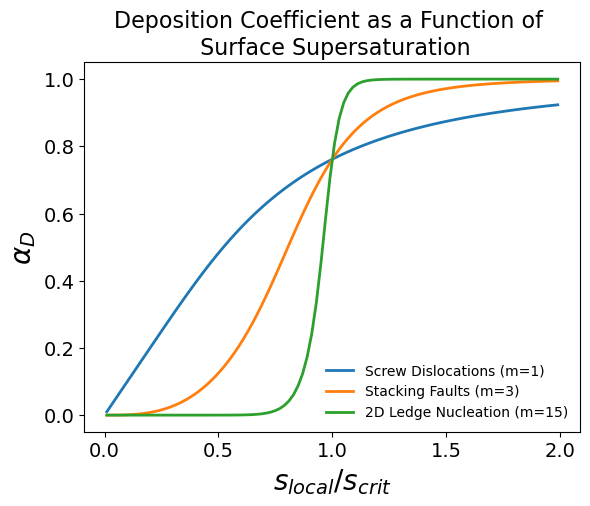

In [16]:
fig = plt.plot(figsize=(12,12))
#plt.rcParams["figure.figsize"] = (6,6)
plt.title('Deposition Coefficient as a Function of \n Surface Supersaturation',fontsize=16)
plt.plot(sratio,am1,label='Screw Dislocations (m=1)',linewidth=2)
plt.plot(sratio,am3,label='Stacking Faults (m=3)',linewidth=2)
plt.plot(sratio,am15,label='2D Ledge Nucleation (m=15)',linewidth=2)
plt.ylabel(r'$\alpha_{D}$',fontsize=20)
plt.xlabel(r'$s_{local}/s_{crit}$',fontsize=20)
plt.legend(frameon=False)
plt.xticks(fontsize=14)
plt.locator_params(axis="x", nbins=5)
plt.yticks(fontsize=14)
#plt.show()
plt.savefig("DepositionModel.png")

In [17]:
# Parameterizations for temperature dependence of S_char
def scrita_l2009(T_celsius):
    return 0.00048988*(abs(T_celsius))**2.5539 / 100.
def scrita_woods(T_celsius):
    return 0.00033266*(abs(T_celsius))**3.0999 / 100.
def scrita_h2016(T_celsius):
    return 0.0096066*(abs(T_celsius))**1.9171 / 100.
def scrita_h2019(T_celsius):
    # these are from Table 1 in Harrington et al. 2019 i(https://doi.org/10.1175/JAS-D-18-0319.1)
    # https://journals.ametsoc.org/view/journals/atsc/78/3/JAS-D-20-0228.1.xml
    # c axis (basal facet)
    T0 = 273.15
    T_kelvin = T_celsius+273.15
    delT = T_kelvin - T0
    
    sc = np.zeros(T_celsius.shape[0])
    # a axis (prism facet)
    sa = np.zeros(T_celsius.shape[0])
    
    for i in range(0,T_celsius.shape[0]):
        x = max(-100.0,min(delT[i],-1.0))
        #print(x)

        if delT[i]<-30:
            sc[i] = 3.7955 + 0.10614*x + 0.00753*x**2
            sa[i] = sc[i]
        
        elif (delT[i] >= -30) and (delT[i]<=-22.0):
            sc[i] = 753.63 + 105.97 * x + 5.5532 * x**2 + 0.12809 * x**3 + 0.001103 * x**4
                
        elif (delT[i] >= -22) and (delT[i]<=-1.0):
            sc[i] = 1.1217 + 0.038098 * x - 0.083749 * x**2- 0.015734 * x**3 \
            - 0.0010108 * x**4- 2.9148e-05 * x**5 - 3.1823e-07 * x**6
        elif delT[i]>-1.0:
            sc[i] = 1.1217 + 0.038098 * x - 0.083749 * x**2- 0.015734 * x**3 \
            - 0.0010108 * x**4- 2.9148e-05 * x**5 - 3.1823e-07 * x**6              
        if (delT[i]>=-30.0) and (delT[i]<=-22.0):
            sa[i] =  -0.71057 - 0.14775*x + 0.0042304*x**2
            
        elif (delT[i]>=-22) and (delT[i]<=-15.0):
            sa[i] = -5.2367 - 1.3184*x - 0.11066*x**2 - 0.0032303*x**3
        elif (delT[i]>=-15.0) and (delT[i]<=-1.0):
            sa[i] = 0.34572 - 0.0093029*x + 0.00030832*x**2 # fit to Nelson & Night
        elif delT[i]>-1.0:
            sa[i] = 0.34572 - 0.0093029*x + 0.00030832*x**2 # fit to Nelson & Night
    sc = sc/100.0
    sa = sa/100.0
    
    return sc, sa

In [18]:
T0 = 273.15
Tmax = 273.15-T0
Tmin = 175.-T0
dT = Tmax - Tmin

temp = -1*np.arange(0,90,1) #+Tmin
Tk = temp+T0

sc_l2009 = scrita_l2009(temp)
sc_woods = scrita_woods(temp)
sc_h2016 = scrita_h2016(temp)
sc_h2019, sa_h2019 = scrita_h2019(temp)

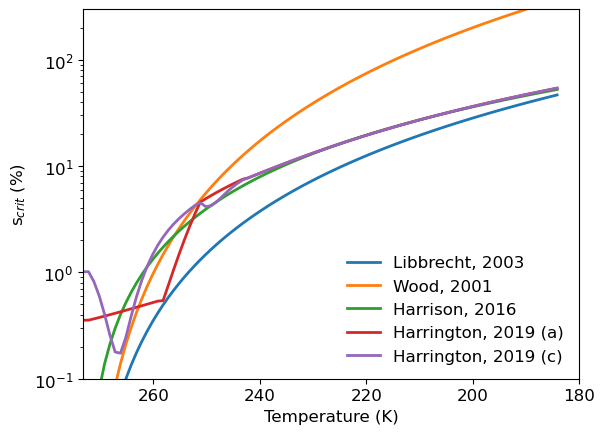

In [19]:
fs = 12
fig = plt.plot(figsize=(6,6))
#plt.rcParams["figure.figsize"] = (10,8)
#plt.title('Temperature Dependence of Characteristic Supersaturation',fontsize=fs+2)
plt.plot(273.15-abs(temp),sc_l2009*100.0,label='Libbrecht, 2003',linewidth=2)
plt.plot(273.15-abs(temp),sc_woods*100.0,label='Wood, 2001',linewidth=2)
plt.plot(273.15-abs(temp),sc_h2016*100.0,label='Harrison, 2016',linewidth=2)
plt.plot(273.15-abs(temp),sa_h2019*100.0,label='Harrington, 2019 (a)',linewidth=2)
plt.plot(273.15-abs(temp),sc_h2019*100.0,label='Harrington, 2019 (c)',linewidth=2)
#plt.ylabel('Char. Supersaturation (%)',fontsize=fs-2)
plt.ylabel(r's$_{crit}$ (%)',fontsize=fs)
#plt.xlabel(r'Supercooling ($^{\circ}$C)',fontsize=fs-2)
plt.xlabel('Temperature (K)',fontsize=fs)
plt.legend(frameon=False,fontsize=fs)
plt.yscale('log')
plt.ylim([0.1,299])
#plt.xlim([0,75])
plt.xlim([273.15,180])
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.show()
plt.savefig("CharSupersatExp.png")